In [13]:
#load the data  '.xlsx' to '.csv' using pandas
import pandas as pd

data_xls = pd.read_excel('ccpp.xlsx', index_col=0)
data_xls.to_csv('ccpp.csv', encoding='utf-8')

data = pd.read_csv('ccpp.csv')

In [16]:
#import & magic command
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets,linear_model

#read data(first 5 lines) to obtain the feature
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [18]:
#Collating input sample X
X=data[['AT','V','AP','RH']]
X.head()
#Collating output sample y
y=data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [20]:
#split the train & test set 
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
print(X_train.shape)
print(X_test.shape)

(7176, 4)
(2392, 4)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
#LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)


[ 460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


In [24]:
#test set testing
y_pred = model.predict(X_test)

from sklearn import metrics
# computing MSE(Mean Squared Error)
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
# computing RMSE(Root Mean Squared Error)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#choose the lowest MSE 

MSE: 20.8371915472
RMSE: 4.56477727247


In [25]:
#cross validation
X = data[['AT','V','AP','RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
cross_pred = cross_val_predict(model,X,y,cv=10)
# MSE
print("MSE:",metrics.mean_squared_error(y,cross_pred))
# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y,cross_pred)))


MSE: 20.7936725099
RMSE: 4.56000795064


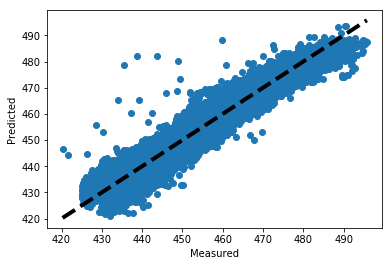

In [27]:
#visualize the result
fig,ax = plt.subplots()
ax.scatter(y,cross_pred)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()